In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df=pd.read_csv("Unemployment2.csv")

In [24]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [25]:
df.shape

(267, 9)

In [26]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [28]:
#renaming the columns
df.columns=["state","date","frequency","estimated_unemployment_rate","estimated_employed","estimated_labour_participation_rate","region","longitude","latitude"]

In [29]:
df.head()

,state,date,frequency,estimated_unemployment_rate,estimated_employed,estimated_labour_participation_rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [33]:
#converting the date to dtype datetime
df.date = pd.to_datetime(df.date)
#converting to categorical
df.frequency = df.frequency.astype('category')
df.region = df.region.astype('category')

In [34]:
df.describe()

,estimated_unemployment_rate,estimated_employed,estimated_labour_participation_rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [35]:
df.region.unique()

['South', 'Northeast', 'East', 'West', 'North']
Categories (5, object): ['East', 'North', 'Northeast', 'South', 'West']

In [44]:
mean_unemployment_by_region = df.groupby('region')['estimated_unemployment_rate'].mean().reset_index()

In [45]:
print("Mean Unemployment Rates by Region:")
print(mean_unemployment_by_region)

Mean Unemployment Rates by Region:
      region  estimated_unemployment_rate
0       East                    13.916000
1      North                    15.889620
2  Northeast                    10.950263
3      South                    10.454667
4       West                     8.239000


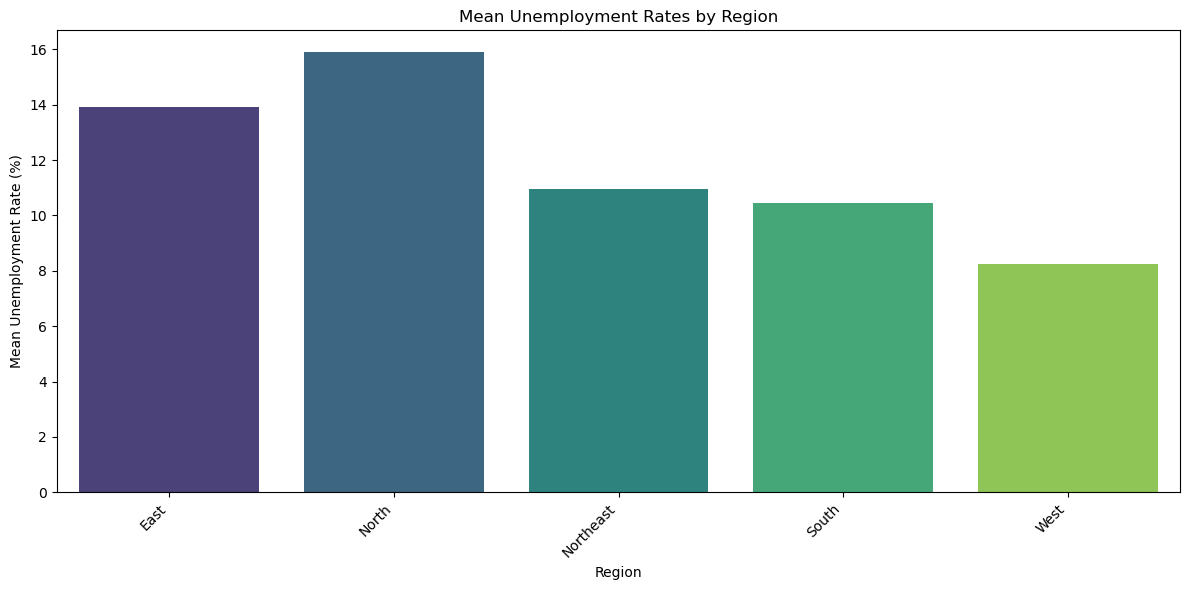

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='estimated_unemployment_rate', data=mean_unemployment_by_region, palette='viridis')
plt.title('Mean Unemployment Rates by Region')
plt.xlabel('Region')
plt.ylabel('Mean Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#we could see that north region has more unemployment rate

<Figure size 1200x800 with 0 Axes>

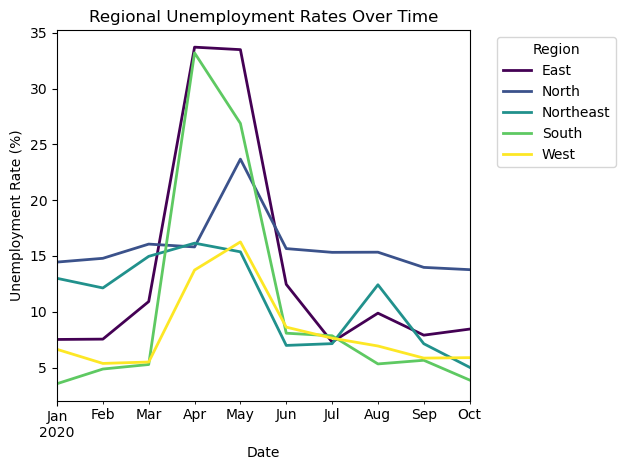

In [48]:
pivot_df = df.pivot_table(index='date', columns='region', values='estimated_unemployment_rate', aggfunc='mean')
# Plotting time series of regional unemployment rates
plt.figure(figsize=(12, 8))
pivot_df.plot(lw=2, colormap='viridis')
plt.title('Regional Unemployment Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#we could see that the unemployment rates were in peak in the months of april,may

In [49]:
#identifying the states which had the highest unemployment rate
df_sorted = df.sort_values(by='estimated_unemployment_rate', ascending=False)
top_5_unemployed_states = df_sorted.head(5)

In [51]:
print("The top 5 unemployed states:")
print(top_5_unemployed_states.state)

The top 5 unemployed states:
172    Puducherry
103     Jharkhand
173    Puducherry
210    Tamil Nadu
102     Jharkhand
Name: state, dtype: object


In [52]:
mean_participation_by_region = df.groupby('region')['estimated_labour_participation_rate'].mean().reset_index()

In [53]:
merged_df = mean_participation_by_region.merge(mean_unemployment_by_region, on='region', how='left')

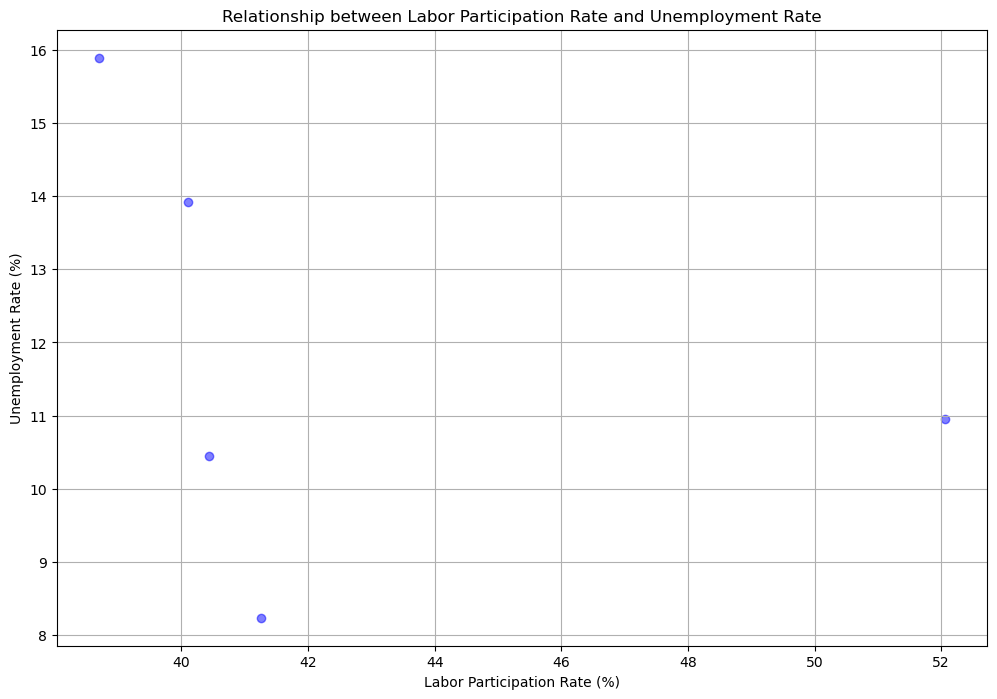

In [57]:
plt.figure(figsize=(12, 8))
# Scatter plot
plt.scatter(merged_df['estimated_labour_participation_rate'], merged_df['estimated_unemployment_rate'], color='blue', alpha=0.5)
plt.title('Relationship between Labor Participation Rate and Unemployment Rate')
plt.xlabel('Labor Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [60]:
correlation_matrix = merged_df[['estimated_unemployment_rate', 'estimated_labour_participation_rate']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                     estimated_unemployment_rate  \
estimated_unemployment_rate                             1.000000   
estimated_labour_participation_rate                    -0.329401   

                                     estimated_labour_participation_rate  
estimated_unemployment_rate                                    -0.329401  
estimated_labour_participation_rate                             1.000000  


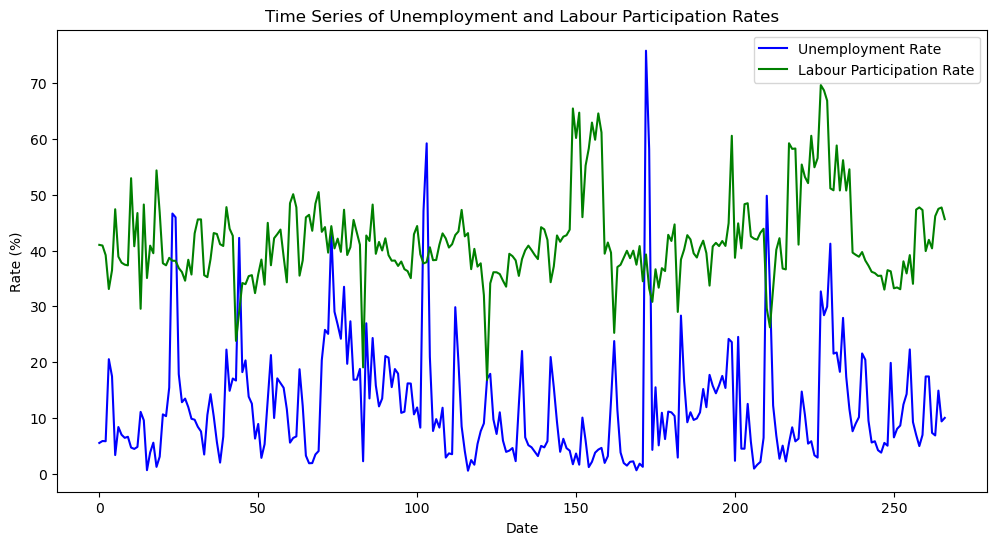

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df['estimated_unemployment_rate'], label='Unemployment Rate', color='blue')
plt.plot(df['estimated_labour_participation_rate'], label='Labour Participation Rate', color='green')
plt.title('Time Series of Unemployment and Labour Participation Rates')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()

In [63]:
df['month'] = df['date'].dt.to_period('M')  # Extract the month
monthly_employed = df.groupby(['region', 'month'])['estimated_employed'].sum().reset_index()

In [64]:
most_employed_region = monthly_employed.groupby('region')['estimated_employed'].sum().idxmax()
print(f"The most employed region is: {most_employed_region}")

The most employed region is: North


In [65]:
most_employed_month = monthly_employed.loc[monthly_employed['estimated_employed'].idxmax(), 'month']
print(f"The month with the highest employment is: {most_employed_month}")

The month with the highest employment is: 2020-01


In [71]:
average_employment_by_region = monthly_employed.groupby('region')['estimated_employed'].mean().reset_index()
employment_rankings = average_employment_by_region.sort_values(by='estimated_employed', ascending=False)
print("Regional Employment Rankings:")
print(employment_rankings)

Regional Employment Rankings:
      region  estimated_employed
1      North         103272654.6
4       West          93117563.6
3      South          84243536.0
0       East          78409467.6
2  Northeast          13745001.0


In [72]:
monthly_participation = df.groupby(['region', 'month'])['estimated_labour_participation_rate'].mean().reset_index()
most_participated_region = monthly_participation.groupby('region')['estimated_labour_participation_rate'].mean().idxmax()
print(f"The most participated region is: {most_participated_region}")

The most participated region is: Northeast


In [73]:
average_participation_by_region = monthly_participation.groupby('region')['estimated_labour_participation_rate'].mean().reset_index()
# Regional Labour Participation Rankings
participation_rankings = average_participation_by_region.sort_values(by='estimated_labour_participation_rate', ascending=False)
print("Regional Labour Participation Rankings:")
print(participation_rankings)

Regional Labour Participation Rankings:
      region  estimated_labour_participation_rate
2  Northeast                            52.434750
4       West                            41.257000
3      South                            40.436167
0       East                            40.108750
1      North                            38.616875


In [79]:
# Filter data for the period from January to April before the lockdown
pre_lockdown_data = df.loc[('2020-01-01' <= df.index) & (df.index < '2020-03-30')]
#fiter data for period from april to july after lockdown
post_lockdown_data = df.loc[('2020-04-01' <= df.index) & (df.index <= '2020-07-31')]

In [80]:
pre_lockdown_data.describe()

,estimated_unemployment_rate,estimated_employed,estimated_labour_participation_rate,longitude,latitude
count,52.000000,5.200000e+01,52.000000,52.000000,52.000000
mean,9.231346,1.556273e+07,44.403654,22.723342,80.271677
std,7.363258,1.420752e+07,8.073968,6.386147,5.785376
min,0.580000,4.167500e+05,32.990000,10.850500,71.192400
25%,4.530000,3.395647e+06,39.435000,18.112400,76.085600
50%,6.660000,1.031173e+07,42.190000,23.298500,78.838100
75%,11.005000,2.278827e+07,45.520000,27.023800,85.098500
max,32.670000,5.943376e+07,69.690000,33.778200,92.937600


In [81]:
post_lockdown_data.describe()

,estimated_unemployment_rate,estimated_employed,estimated_labour_participation_rate,longitude,latitude
count,107.000000,1.070000e+02,107.000000,107.000000,107.000000
mean,16.503458,1.260711e+07,39.646075,22.799826,80.614271
std,13.675446,1.254458e+07,7.474848,6.241635,5.875604
min,0.600000,1.175420e+05,16.770000,10.850500,71.192400
25%,6.960000,2.707094e+06,36.105000,18.112400,76.085600
50%,13.470000,9.095944e+06,38.700000,23.610200,79.019300
75%,20.705000,1.906934e+07,42.735000,27.278400,85.279900
max,75.850000,5.620165e+07,62.960000,33.778200,92.937600


In [87]:
percentage_change = ((post_lockdown_data.mean(numeric_only=True) - pre_lockdown_data.mean(numeric_only=True)) / pre_lockdown_data.mean(numeric_only=True)) * 100
# Display the percentage change
print("Percentage Change:")
print(percentage_change)

Percentage Change:
estimated_unemployment_rate            78.776288
estimated_employed                    -18.991653
estimated_labour_participation_rate   -10.714386
longitude                               0.336587
latitude                                0.426793
dtype: float64


In [86]:
regions = pre_lockdown_data['region'].unique()

# Calculate percentage change for each region
region_percentage_change = {}
for region in regions:
    region_data_pre = pre_lockdown_data[pre_lockdown_data['region'] == region]
    region_data_post = post_lockdown_data[post_lockdown_data['region'] == region]
    region_percentage_change[region] = ((region_data_post.mean(numeric_only=True) - region_data_pre.mean(numeric_only=True)) / region_data_pre.mean(numeric_only=True)) * 100

# Display regional percentage change
print("\nRegional Comparisons - Percentage Change:")
for region, change in region_percentage_change.items():
    print(f"{region}: {change}")



Regional Comparisons - Percentage Change:
South: estimated_unemployment_rate            3.518823e+02
estimated_employed                    -2.057948e+01
estimated_labour_participation_rate   -1.103521e+01
longitude                             -1.280076e-14
latitude                               0.000000e+00
dtype: float64
Northeast: estimated_unemployment_rate            -9.187226
estimated_employed                    -37.358917
estimated_labour_participation_rate   -20.345377
longitude                               2.311450
latitude                               -0.973191
dtype: float64
East: estimated_unemployment_rate            1.887367e+02
estimated_employed                    -2.090882e+01
estimated_labour_participation_rate   -9.772136e+00
longitude                             -1.533907e-14
latitude                               0.000000e+00
dtype: float64
West: estimated_unemployment_rate            9.279640e+01
estimated_employed                    -1.465549e+01
estimated_lab

In [95]:
unemployment_rate_pre_by_state = pre_lockdown_data.groupby('state')['estimated_unemployment_rate'].mean()
unemployment_rate_post_by_state = post_lockdown_data.groupby('state')['estimated_unemployment_rate'].mean()
print("unemployment rates before lockdown")
print(unemployment_rate_pre_by_state.head())
print("unemployment rates after lockdown")
print(unemployment_rate_post_by_state.head())

unemployment rates before lockdown
state
Andhra Pradesh     5.655
Assam              4.535
Bihar             10.450
Chhattisgarh       9.015
Delhi             18.535
Name: estimated_unemployment_rate, dtype: float64
unemployment rates after lockdown
state
Andhra Pradesh    12.3975
Assam              6.2450
Bihar             30.8025
Chhattisgarh       9.6025
Delhi             24.3600
Name: estimated_unemployment_rate, dtype: float64


In [99]:
sorted_pre_lockdown = unemployment_rate_pre_by_state.sort_values(ascending=False)
sorted_post_lockdown = unemployment_rate_post_by_state.sort_values(ascending=False)

# Display the sorted state names
print("Top States by Mean Unemployment Rate - Pre-Lockdown:")
print(sorted_pre_lockdown.head(5))

print("\nTop States by Mean Unemployment Rate - Post-Lockdown:")
print(sorted_post_lockdown.head(5))

Top States by Mean Unemployment Rate - Pre-Lockdown:
state
Tripura             30.535
Haryana             23.055
Jammu & Kashmir     20.930
Delhi               18.535
Himachal Pradesh    16.835
Name: estimated_unemployment_rate, dtype: float64

Top States by Mean Unemployment Rate - Post-Lockdown:
state
Puducherry    38.4375
Jharkhand     33.7250
Bihar         30.8025
Haryana       30.7800
Tripura       25.6725
Name: estimated_unemployment_rate, dtype: float64
